In [1]:
import os
import glob
import time

import pandas as pd
import numpy as np
import xarray as xr
from scipy.ndimage import gaussian_filter


import matplotlib
from matplotlib import pyplot as plt
#from matplotlib.ticker import NullFormatter
#matplotlib.rcParams.update({'font.size': 14})
%matplotlib inline

import cartopy.crs as ccrs
import cartopy

from scipy.stats import t,linregress,pearsonr

from precip_model_functions import *

/global/homes/q/qnicolas/.conda/envs/era5/lib/python3.7/site-packages/xarray/core/merge.py:17: FutureWarning: The Panel class is removed from pandas. Accessing it from the top-level namespace will also be removed in the next version
  PANDAS_TYPES = (pd.Series, pd.DataFrame, pd.Panel)


## Temporal plots of regional-average omega with different models

In [100]:
def plot_omegas(days,omegas,prs,ctname):
    omega_era5_og       = omegas[0]
    omega_upssin_og     = omegas[1]
    omega_upsblqesin_og = omegas[2]
    pr_era5_og       = prs[0]
    pr_upssin_og     = prs[1]
    pr_upsblqesin_og = prs[2]
    
    fig,(ax1,ax2)=plt.subplots(1,2,figsize=(20,5))
    ax1.plot(days,-np.array(omega_era5_og      )   ,label="ERA5 omega")
    ax1.plot(days,-np.array(omega_upssin_og    )   ,label="sin upslope omega",color="k")
    ax1.plot(days,-np.array(omega_upsblqesin_og)   ,label="sin upslope+convective omega",color="y")
    ax1.set_xlabel("date")
    ax1.set_ylabel("MINUS omega (Pa/s)")
    ax1.set_title("MINUS OMEGA", fontsize=18)
    
    ax2.plot(days,np.array(pr_era5_og      )   ,label="O'Gorman w/ ERA5 omega")
    ax2.plot(days,np.array(pr_upssin_og    )   ,label="O'Gorman w/ sin upslope omega",color="k")
    ax2.plot(days,np.array(pr_upsblqesin_og)   ,label="O'Gorman w/ sin upslope+convective omega",color="y")
    ax2.set_xlabel("date")
    ax2.set_ylabel("model event precip (mm)")
    ax2.set_title("PRECIPITATION", fontsize=18)
    
    ax1.legend()
    ax2.legend()
    fig.suptitle(ctname+" rx5 events",fontsize=22,fontweight='bold')
    return ax1,ax2

In [101]:
def plot_vdistrib_omegas(days,omegas,levels,ctname):
    omega_era5_og       = omegas[0]
    omega_upssin_og     = omegas[1]
    omega_upsblqesin_og = omegas[2]
    
    fig,ax=plt.subplots(1,1,figsize=(5,5))
    ax.plot(-np.array(omega_era5_og      ),levels   ,label="ERA5 omega")
    ax.plot(-np.array(omega_upssin_og    ),levels   ,label="sin upslope omega",color="k")
    ax.plot(-np.array(omega_upsblqesin_og),levels   ,label="sin upslope+convective omega",color="y")
    ax.set_xlabel("MINUS omega (Pa/s)")
    ax.set_ylabel("pressure level (hPa)")
    ax.set_title("MINUS OMEGA -- "+ctname+" rx5 events mean", fontsize=18,fontweight='bold')
    
    return ax

In [102]:
ct = "nepal"
omeganep= retrieve_omega_rx5(rx5[ct],box[ct]["small"],ct,["oper.an.pl.128_135_w.ll025sc","omegaupslopesin","omegaupslopeblqeWRONGsin"])
prnep= retrieve_modeled_precip_rx5(rx5[ct],box[ct]["small"],ct,["omegaERA5Xqinteg.plev8_4","omegaupslopesinXqinteg.plev8_4","omegaupslopeblqeWRONGsinXqinteg.plev8_4"],0,0,0)


In [103]:
omeganep_boxavg = np.array([[spacemean_era5(om,box[ct]["small"])[list(om.data_vars)[0]] for om in model]  for model in omeganep])
omeganep_avg = np.mean(omeganep_boxavg,axis=2)
omeganep_vdistrib = np.mean(omeganep_boxavg,axis=1)
levels = np.array(omeganep[0][0].level)


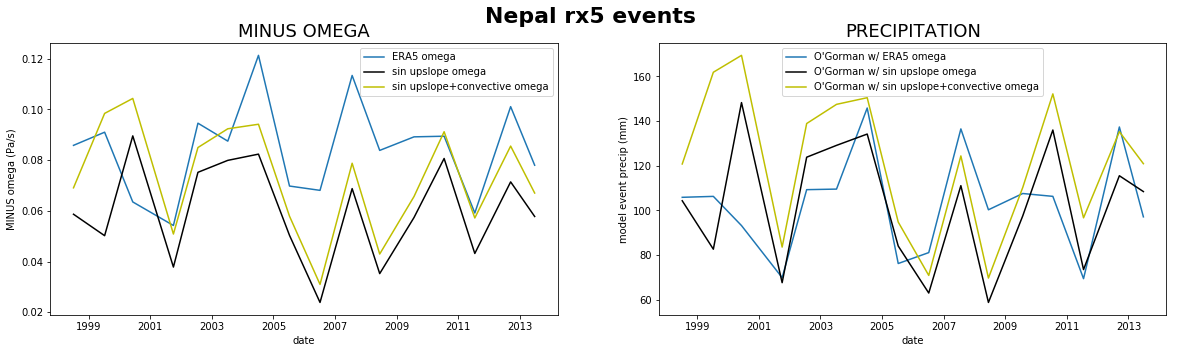

In [104]:
ct = "nepal"
pr =              prnep
omega =        omeganep_avg
omega_vdistrib=omeganep_vdistrib
ax1,ax2 = plot_omegas(rx5_datetime[ct],omega,pr,names[ct])

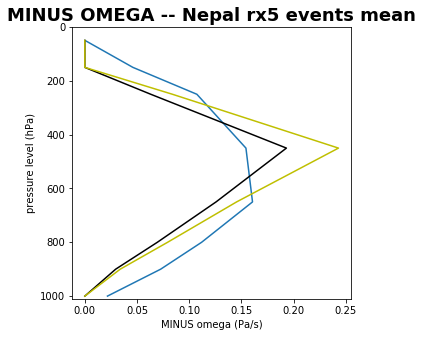

In [105]:
ax = plot_vdistrib_omegas(rx5_datetime[ct],omega_vdistrib,levels,names[ct])
plt.gca().set_ylim(1010, 0)
None

In [106]:
ct = "Candes"
omegaCan= retrieve_omega_rx5(rx5[ct],box[ct]["small"],ct,["oper.an.pl.128_135_w.ll025sc","omegaupslopesin","omegaupslopeblqeWRONGsin"])
prCan= retrieve_modeled_precip_rx5(rx5[ct],box[ct]["small"],ct,["omegaERA5Xqinteg.plev8_4","omegaupslopesinXqinteg.plev8_4","omegaupslopeblqeWRONGsinXqinteg.plev8_4"],0,0,0)


In [107]:
omegaCan_boxavg = np.array([[spacemean_era5(om,box[ct]["small"])[list(om.data_vars)[0]] for om in model]  for model in omegaCan])
omegaCan_avg = np.mean(omegaCan_boxavg,axis=2)
omegaCan_vdistrib = np.mean(omegaCan_boxavg,axis=1)
levels = np.array(omeganep[0][0].level)


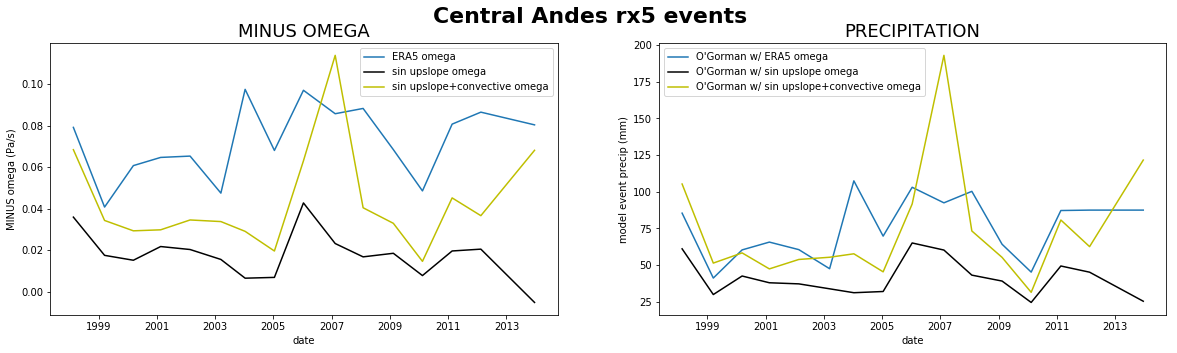

In [108]:
ct = "Candes"
pr =              prCan
omega =        omegaCan_avg
omega_vdistrib=omegaCan_vdistrib
ax1,ax2 = plot_omegas(rx5_datetime[ct],omega,pr,names[ct])

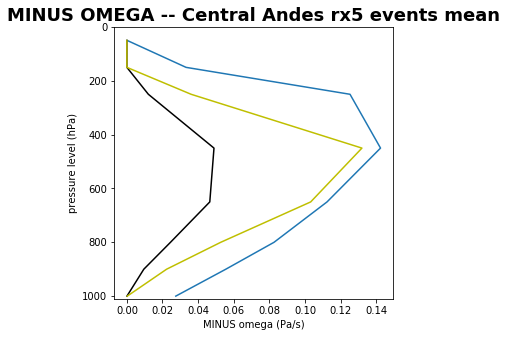

In [109]:
ax = plot_vdistrib_omegas(rx5_datetime[ct],omega_vdistrib,levels,names[ct])
plt.gca().set_ylim(1010, 0)
None

In [110]:
ct = "Sandes"
omegaSan= retrieve_omega_rx5(rx5[ct],box[ct]["small"],ct,["oper.an.pl.128_135_w.ll025sc","omegaupslopesin","omegaupslopeblqeWRONGsin"])
prSan= retrieve_modeled_precip_rx5(rx5[ct],box[ct]["small"],ct,["omegaERA5Xqinteg.plev8_4","omegaupslopesinXqinteg.plev8_4","omegaupslopeblqeWRONGsinXqinteg.plev8_4"],0,0,0)


In [111]:
omegaSan_boxavg = np.array([[spacemean_era5(om,box[ct]["small"])[list(om.data_vars)[0]] for om in model]  for model in omegaSan])
omegaSan_avg = np.mean(omegaSan_boxavg,axis=2)
omegaSan_vdistrib = np.mean(omegaSan_boxavg,axis=1)
levels = np.array(omegaSan[0][0].level)


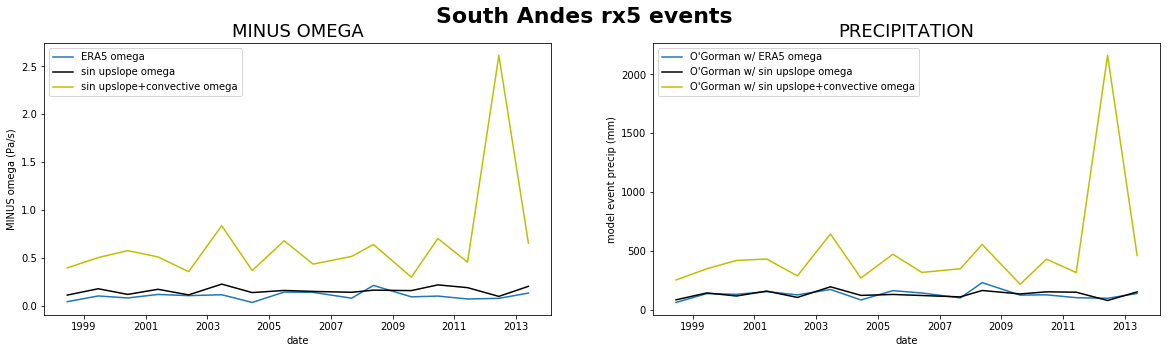

In [112]:
ct = "Sandes"
pr =              prSan
omega =        omegaSan_avg
omega_vdistrib=omegaSan_vdistrib
ax1,ax2 = plot_omegas(rx5_datetime[ct],omega,pr,names[ct])

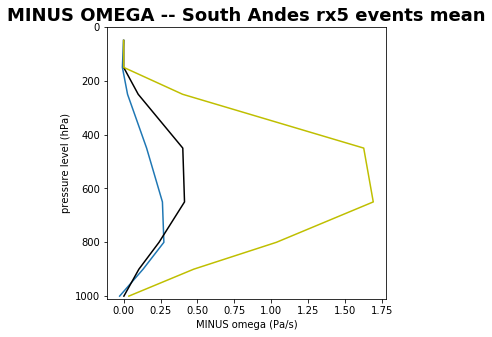

In [113]:
ax = plot_vdistrib_omegas(rx5_datetime[ct],omega_vdistrib,levels,names[ct])
plt.gca().set_ylim(1010, 0)
None

In [114]:
ct = "california"
omegacal= retrieve_omega_rx5(rx5[ct],box[ct]["small"],ct,["oper.an.pl.128_135_w.ll025sc","omegaupslopesin","omegaupslopeblqeWRONGsin"])
prcal= retrieve_modeled_precip_rx5(rx5[ct],box[ct]["small"],ct,["omegaERA5Xqinteg.plev8_4","omegaupslopesinXqinteg.plev8_4","omegaupslopeblqeWRONGsinXqinteg.plev8_4"],0,0,0)


In [115]:
omegacal_boxavg = np.array([[spacemean_era5(om,box[ct]["small"])[list(om.data_vars)[0]] for om in model]  for model in omegacal])
omegacal_avg = np.mean(omegacal_boxavg,axis=2)
omegacal_vdistrib = np.mean(omegacal_boxavg,axis=1)
levels = np.array(omegacal[0][0].level)


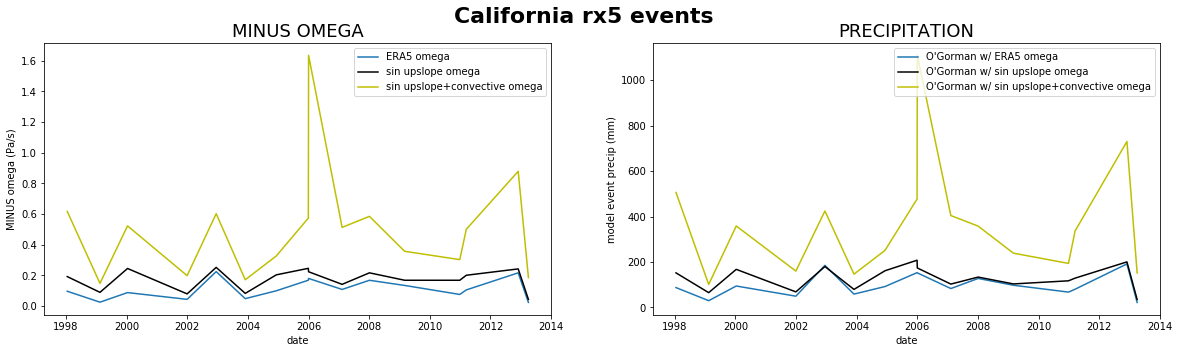

In [116]:
ct = "california"
pr =              prcal
omega =        omegacal_avg
omega_vdistrib=omegacal_vdistrib
ax1,ax2 = plot_omegas(rx5_datetime[ct],omega,pr,names[ct])

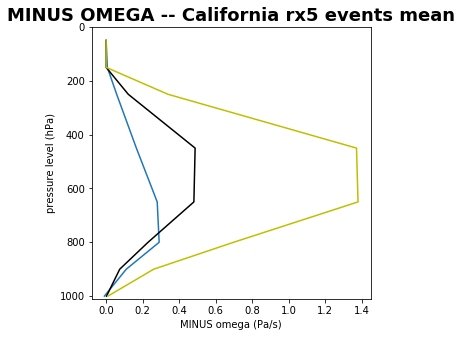

In [117]:
ax = plot_vdistrib_omegas(rx5_datetime[ct],omega_vdistrib,levels,names[ct])
plt.gca().set_ylim(1010, 0)
None

## Comparing terms in the BLQE approximation 

In [2]:
def blqe_terms(d,lonlat):
    #Get the five days around d
    dp = pd.to_datetime(d, format='%Y%m%d')
    ds = [(dp + pd.Timedelta(days=i)).strftime("%Y%m%d") for i in range(-2,3)]   
    
    #temp,ps
    t = time.time()
    temp = retrieve_era5_pl(ds,lonlat,'128_130_t')
    ps = retrieve_era5_sfc(ds,lonlat,'128_134_sp')
    print("time to compute temperature, sfc pressure : ", time.time()-t)
    
    #ub, vb, temp2m
    t = time.time()
    ub = retrieve_era5_sfc(ds,lonlat,'228_246_100u') # 100m u
    vb = retrieve_era5_sfc(ds,lonlat,'228_247_100v') # 100m v
    temp_2m = retrieve_era5_sfc(ds,lonlat,'128_167_2t')            
    print("time to compute ub,vb and 2m temperature : ", time.time()-t)
    
    #specific humidity
    t = time.time()
    q = retrieve_era5_pl(ds,lonlat,'128_133_q',firstlev=21,levdisc=1)
    print("time to compute specific humidity : ", time.time()-t)     
    
    Lv = 2257e3 #latent heat of vaporization of water, 100°C, in J/kg
    cp = 1e3 #specific heat at constant pressure of air, 100°C, in J/K/kg
    b = 500 # subcloud layer height, in m

    temp_500 = temp.sel(level=500,method="nearest",drop=True)
    q_500 = q.sel(level=500,method="nearest",drop=True)
    q_surf = q.sel(level=ps/100,method="nearest",drop=True)
    gz_surf = gz_from_p(ps)
    
    h_b = gz_surf+cp*temp_2m+Lv*q_surf
    h_mid = gz_from_p(5e4) + cp*temp_500+Lv*q_500
    
    ddxh_b = h_b.differentiate("longitude")/(m_per_degreelat*coslat)
    ddyh_b = h_b.differentiate("latitude")/m_per_degreelat   
    
    ddxorog1=ddxorog_s.sel(longitude=slice(lonlat[0],lonlat[1]),latitude=slice(lonlat[3],lonlat[2])).isel(time=0)
    ddyorog1=ddyorog_s.sel(longitude=slice(lonlat[0],lonlat[1]),latitude=slice(lonlat[3],lonlat[2])).isel(time=0) 
    
    ugradhb = ub*ddxh_b*np.cos(ddxorog1)**2+vb*ddyh_b*np.cos(ddyorog1)**2
    
    return ugradhb,h_mid-h_b


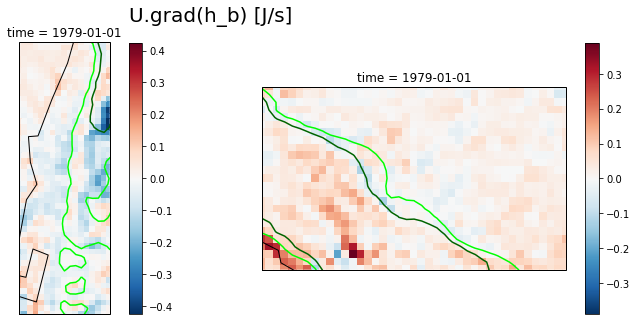

In [36]:
fig, (ax1,ax2) = plt.subplots(1,2,figsize=(15,5),subplot_kw={'projection': ccrs.PlateCarree()})

ax1.coastlines()
ugradhbSan_meant.plot(ax=ax1,transform=ccrs.PlateCarree())#,levels=np.linspace(0,M), cbar_kwargs={"ticks": np.linspace(0,M,11)})
ax1.set_title("South Andes")

kw = {'levels':[1000,2000], 'colors':['lime','darkgreen']}
orog.isel(time=0).plot.contour(ax=ax1,transform=ccrs.PlateCarree(),**kw)
ax1.set_extent(box["Sandes"]["small"])

ax2.coastlines()
ugradhbCan_meant.plot(ax=ax2,transform=ccrs.PlateCarree())
ax2.set_title("Central Andes")
orog.isel(time=0).plot.contour(ax=ax2,transform=ccrs.PlateCarree(),**kw)
ax2.set_extent(box["Candes"]["small"])

fig.suptitle("U.grad(h_b) [J/s]",fontsize=20)
None


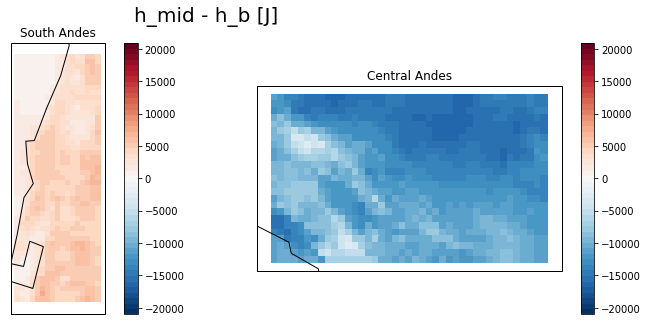

In [24]:
fig, (ax1,ax2) = plt.subplots(1,2,figsize=(15,5),subplot_kw={'projection': ccrs.PlateCarree()})

M=21000
Mtick=20000
ax1.coastlines()
h_mid_h_bSan_meant.plot(ax=ax1,transform=ccrs.PlateCarree(),cmap=plt.cm.RdBu_r,levels=np.linspace(-M,M), cbar_kwargs={"ticks": np.linspace(-Mtick,Mtick,9)})
ax1.set_title("South Andes")

ax2.coastlines()
h_mid_h_bCan_meant.plot(ax=ax2,transform=ccrs.PlateCarree(),cmap=plt.cm.RdBu_r,levels=np.linspace(-M,M), cbar_kwargs={"ticks": np.linspace(-Mtick,Mtick,9)})
ax2.set_title("Central Andes")

fig.suptitle("h_mid - h_b [J]",fontsize=20)
None

### Testing the instability condition (h*_upper tropospheric < h_boundary layer)

In [67]:
Lv = 2257e3 
cp = 1e3
ds = [rx5["Candes"][0]]
lonlat=box["Candes"]["small"]

t=time.time()
q = retrieve_era5_pl(ds,lonlat,'128_133_q',firstlev=21,levdisc=1)
gz = retrieve_era5_pl(ds,lonlat,'128_129_z',firstlev=14,levdisc=1)
temp_2m = retrieve_era5_sfc(ds,lonlat,'128_167_2t')  
temp = retrieve_era5_pl(ds,lonlat,'128_130_t',firstlev=14,levdisc=1)
ps = retrieve_era5_sfc(ds,lonlat,'128_134_sp')
print(time.time()-t)

# Compute Boundary layer MSE (h_b)
q_surf = q.sel(level=ps/100,method="nearest",drop=True)
gz_surf = gz.sel(level=ps/100 - 25,method="nearest",drop=True)
h_b = gz_surf+cp*temp_2m+Lv*q_surf

# Compute upper-tropospheric (200-400hPa mean) saturation MSE (hsat_up)
temp_up = temp.sel(level=slice(200.,400.))
gz_up = gz.sel(level=slice(200.,400.))
qsat_up = qsat(temp_up,temp_up.level)
hsat_up_vdist = gz_up+cp*temp_up+Lv*qsat_up
hsat_up=hsat_up_vdist.mean("level")
print(time.time()-t)


24.39805030822754
24.492200136184692


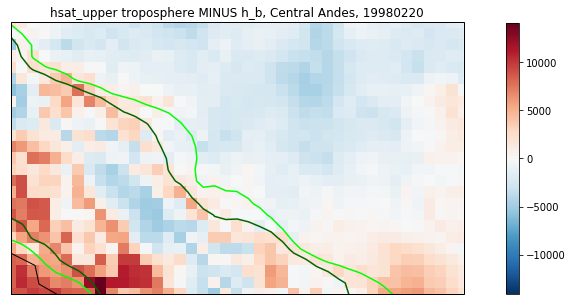

In [73]:
diff = hsat_up-h_b
dif=diff.mean("time")
plt.figure(figsize=(15,5))
ax = plt.axes(projection=ccrs.PlateCarree())
ax.coastlines()
dif.plot(ax=ax,transform=ccrs.PlateCarree())#,cbar_kwargs={"label":"hsatup-hb"})
kw = {'levels':[1000,2000], 'colors':['lime','darkgreen']}
orog.isel(time=0).plot.contour(ax=ax,transform=ccrs.PlateCarree(),**kw)
ax.set_extent(box["Candes"]["small"])
ax.set_title("hsat_upper troposphere MINUS h_b, Central Andes, %s"%rx5["Candes"][0])
None